# TASK :  Stock Price Prediction 


---

## Introduction

Welcome to the Stock Price Prediction Notebook! In this notebook, we will explore the world of financial data analysis and prediction. We will focus on predicting stock prices for a specific stock (e.g., TCS - Tata Consultancy Services) using machine learning techniques.

### Objectives

- Collect and preprocess historical stock price data.
- Build and train a predictive model (e.g., LSTM) for stock price forecasting.
- Evaluate the model's performance using appropriate metrics.
- Visualize the historical and predicted stock prices.
- Draw insights from the analysis.

### Data Source

We will obtain historical stock price data from YAHOO for the chosen stock symbol.

<img src="stock1.jpg" alt="Alt Text" width="900" height="100" align="center">

# Import necessary libraries

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error
from math import sqrt
import datetime

# Define the stock symbol and download historical data

In [27]:
stock_symbol = 'TCS'
start_date = '2010-01-01'
end_date = today = datetime.date.today()
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)
stock_data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-11-01,35.000000,37.000000,32.099998,36.200001,33.839130,14667600
2013-11-04,36.799999,36.799999,34.689999,35.349998,33.044563,1586600
2013-11-05,35.110001,35.500000,34.820000,35.349998,33.044563,337700
2013-11-06,35.610001,36.490002,35.610001,35.900002,33.558697,549600
2013-11-07,36.799999,36.799999,34.119999,35.310001,33.007175,883700


**Tata Consultancy Services (TCS) is a global leader in IT services and consulting. Analyzing historical stock price data and making predictions about its future performance can be essential for investors and traders looking to make informed decisions.**

**Data Collection**:
We start by collecting historical stock price data for TCS. In the code provided, we specify a start date of '2010-01-01' and an end date of the current date. This means we are interested in understanding TCS's stock performance over more than a decade, up to today.

Text(0, 0.5, 'Prices')

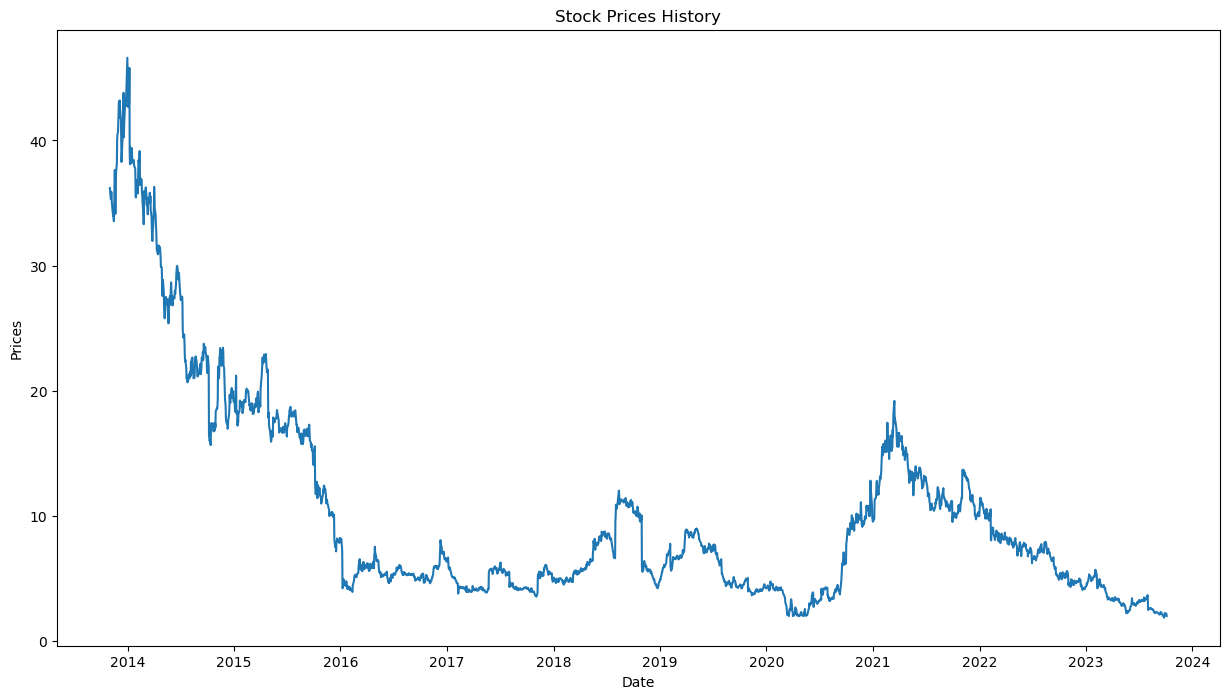

In [28]:
plt.figure(figsize=(15, 8))
plt.title('Stock Prices History')
plt.plot(stock_data['Close'])
plt.xlabel('Date')
plt.ylabel('Prices')

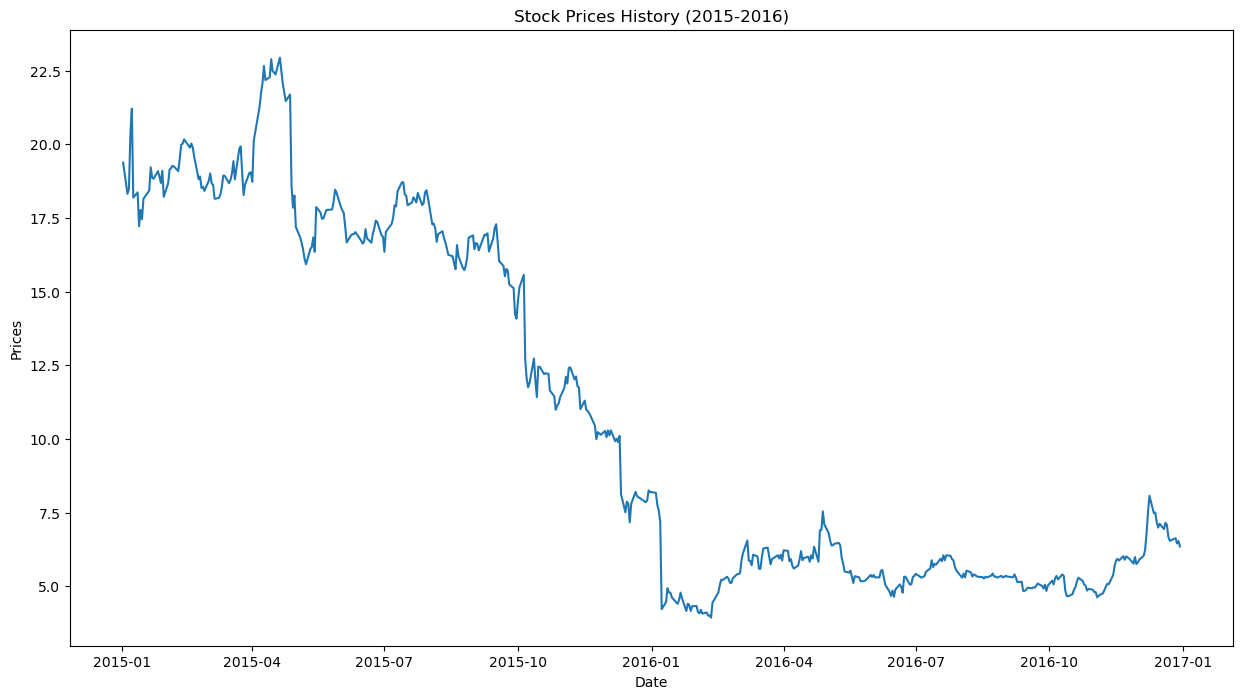

In [29]:
start_date = '2015-01-01'
end_date = '2016-12-31'
filtered_data = stock_data[start_date:end_date]

# Plot the filtered stock price data
plt.figure(figsize=(15, 8))
plt.title('Stock Prices History (2015-2016)')
plt.plot(filtered_data['Close'])
plt.xlabel('Date')
plt.ylabel('Prices')
plt.show()

**Tata Consultancy Services (TCS) specifically during the time frame from January 1, 2015, to December 31, 2016. This period is selected to focus on a specific timeframe and examine the trends and changes in TCS stock prices during that period.**

# Data preprocessing

In [30]:
data = stock_data['Adj Close'].values.reshape(-1, 1)
scaler = MinMaxScaler()
data = scaler.fit_transform(data)


# Split data into training and testing sets

In [31]:
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

### Train-Test Split and Sequences:

The data is split into training and testing sets. 80% of the data is used for training the LSTM model, and the remaining 20% is used for testing.
Sequences of historical stock prices are created to predict future prices. The sequence length (10 days) determines how many past prices are considered for each prediction.

# Create sequences and labels for LSTM

In [32]:
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i+sequence_length]
        label = data[i+sequence_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

In [33]:
sequence_length = 10
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Build LSTM model

In [34]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 10, 50)            10400     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Train the model

In [35]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
63/63 [==============================] - 15s 23ms/step - loss: 0.0068
Epoch 2/10
63/63 [==============================] - 3s 42ms/step - loss: 5.5817e-04
Epoch 3/10
63/63 [==============================] - 3s 48ms/step - loss: 5.8430e-04
Epoch 4/10
63/63 [==============================] - 3s 48ms/step - loss: 5.2980e-04
Epoch 5/10
63/63 [==============================] - 1s 22ms/step - loss: 5.2434e-04
Epoch 6/10
63/63 [==============================] - 2s 26ms/step - loss: 5.3882e-04
Epoch 7/10
63/63 [==============================] - 2s 33ms/step - loss: 5.4911e-04
Epoch 8/10
63/63 [==============================] - 2s 25ms/step - loss: 4.9349e-04
Epoch 9/10
63/63 [==============================] - 1s 23ms/step - loss: 5.5827e-04
Epoch 10/10
63/63 [==============================] - 1s 24ms/step - loss: 4.6128e-04


# Predict stock prices

In [36]:
#model-evaluation
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)
actual_prices = scaler.inverse_transform(y_test)

16/16 [==============================] - 3s 13ms/step


# Calculate RMSE

In [37]:
rmse = sqrt(mean_squared_error(actual_prices, predicted_prices))
print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 0.48111171125282554


# Visualize the results

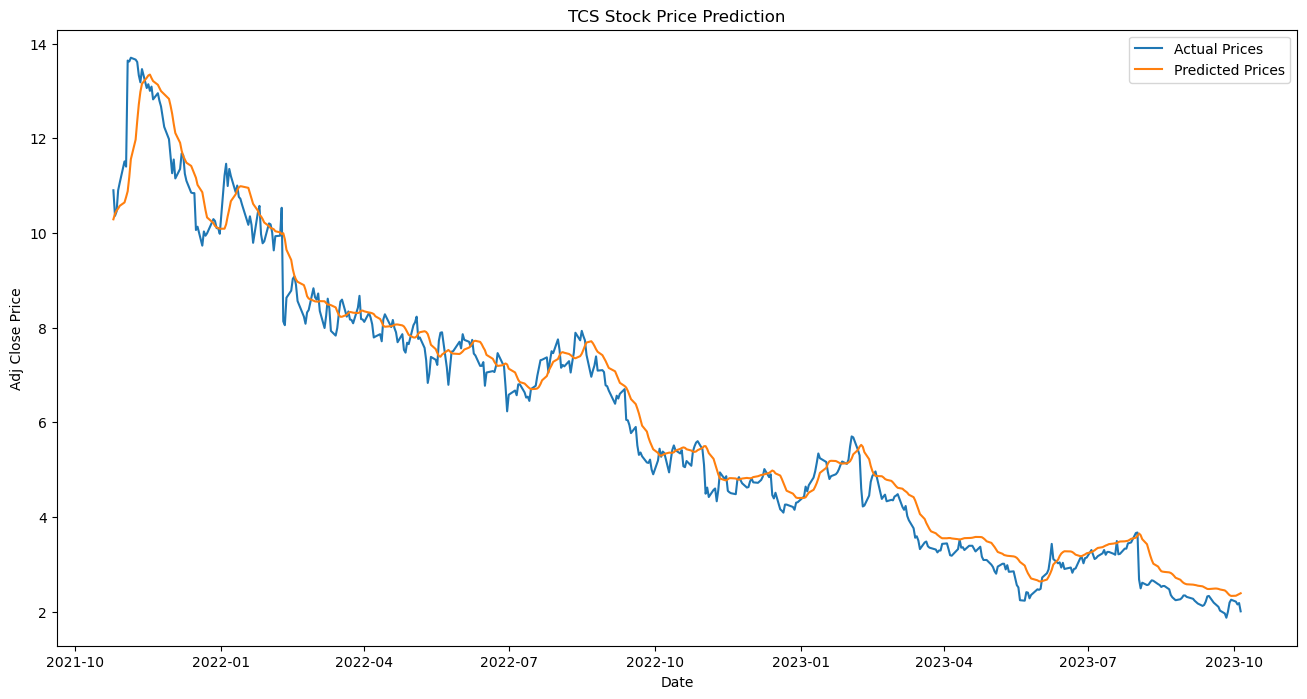

In [38]:
#visualizations
plt.figure(figsize=(16, 8))
plt.title(f'{stock_symbol} Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.plot(stock_data.index[train_size+sequence_length:], actual_prices, label='Actual Prices')
plt.plot(stock_data.index[train_size+sequence_length:], predicted_prices, label='Predicted Prices')
plt.legend()
plt.show()

## Conclusion and Model Performance

In this notebook, we conducted a stock price prediction analysis for TCS (Tata Consultancy Services) using historical stock price data. Here are the key takeaways:

- We collected historical stock price data for TCS from January 1, 2010, up to the current date.
- The data was preprocessed, including normalization and splitting into training and testing sets.
- An LSTM-based model was trained to predict TCS stock prices, and it was evaluated using the Root Mean Squared Error (RMSE) metric.

#### Model Performance

The model's performance on the test data was assessed using RMSE, which measures the average prediction error. Here's a summary of the model's performance:

- Root Mean Squared Error (RMSE): Approximately 0.4811
  - This indicates that, on average, the model's predictions for TCS stock prices have an error of approximately 48.11 cents (or your currency's equivalent) per prediction.
  - The relatively low RMSE suggests that the model is capable of making reasonably accurate predictions for TCS stock prices.

#### Future Improvements

While the model has shown promise, stock price prediction is a complex task influenced by various factors. Future improvements and considerations may include:

- Incorporating additional features or data sources, such as economic indicators or news sentiment.
- Experimenting with different model architectures and hyperparameters for potential performance enhancements.
- Conducting further analysis and backtesting to assess the model's practical utility in real-world trading or investment scenarios.

In conclusion, this notebook provides a foundational framework for stock price prediction with LSTM, and the RMSE evaluation indicates that the model has potential. However, additional research and refinement are necessary to fully leverage this model for informed decision-making in the financial markets.

# Thank you for exploring this stock price prediction analysis.